In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import shap

In [4]:
data = pd.read_csv('data\Data.csv')
data.tail()

,Pysics,Science,Statistics,Math
461,75,91,57,73
462,85,74,74,67
463,65,65,83,85
464,76,91,71,82
465,74,68,85,67


In [5]:
data.isnull().sum()

Pysics        0
Science       0
Statistics    0
Math          0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pysics,466.0,71.742489,16.033238,0.0,66.00,74.0,82.0,99.0
Science,466.0,72.813305,14.270110,0.0,66.00,74.0,83.0,99.0
Statistics,466.0,73.682403,12.180806,22.0,66.25,74.0,83.0,100.0
Math,466.0,74.540773,11.424528,22.0,67.00,74.0,83.0,99.0


In [7]:
print("Number of student: ", len(data))

Number of student:  466


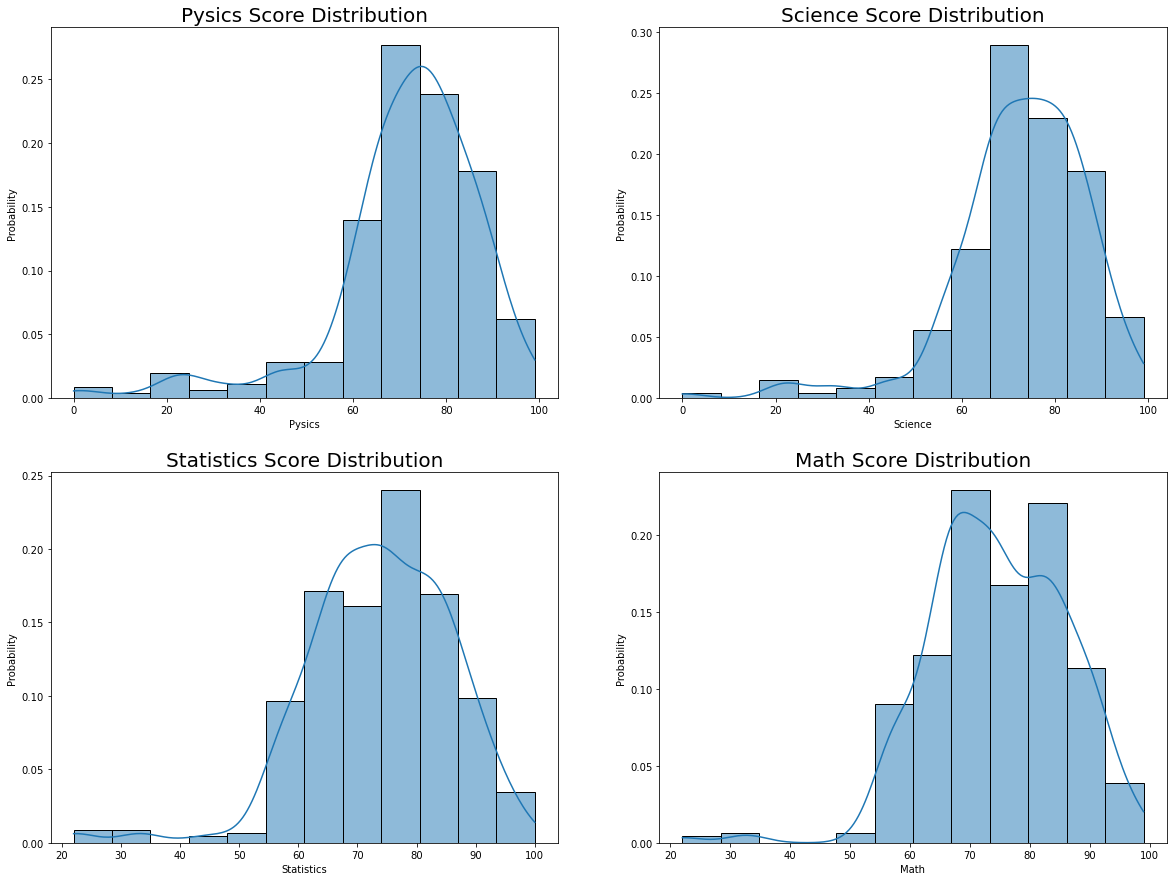

In [8]:
fig, ax=plt.subplots(2,2 ,figsize=(20,15))
sns.histplot(data=data, x='Pysics', kde=True, stat='probability', bins=12, ax=ax[0,0])
ax[0,0].set_title('Pysics Score Distribution', size=20)
sns.histplot(data=data, x='Science', kde=True, stat='probability', bins=12, ax=ax[0,1])
ax[0,1].set_title('Science Score Distribution', size=20)
sns.histplot(data=data, x='Statistics', kde=True, stat='probability', bins=12, ax=ax[1,0])
ax[1,0].set_title('Statistics Score Distribution', size=20)
sns.histplot(data=data, x='Math', kde=True, stat='probability', bins=12, ax=ax[1,1])
ax[1,1].set_title('Math Score Distribution', size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [9]:
data.skew(axis=0)

Pysics       -1.664994
Science      -1.443609
Statistics   -0.849626
Math         -0.561298
dtype: float64

In [10]:
data.kurt(axis=0)

Pysics        4.224896
Science       4.173907
Statistics    2.238504
Math          1.648008
dtype: float64

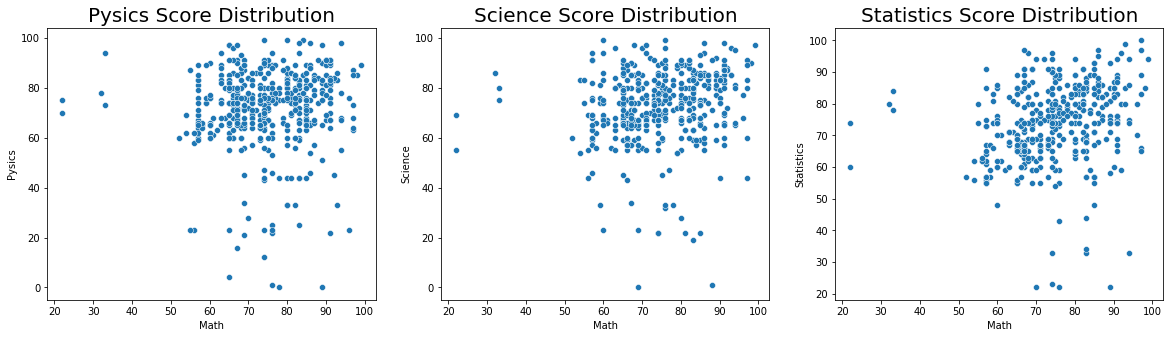

In [11]:
fig, ax=plt.subplots(1,3 ,figsize=(20,5))
sns.scatterplot(data=data, x='Math' , y='Pysics', ax=ax[0])
ax[0].set_title('Pysics Score Distribution', size=20)
sns.scatterplot(data=data, x='Math' , y='Science', ax=ax[1])
ax[1].set_title('Science Score Distribution', size=20)
sns.scatterplot(data=data, x='Math' , y='Statistics', ax=ax[2])
ax[2].set_title('Statistics Score Distribution', size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [12]:
corr = round(data.corr(method='pearson'), 3)
corr

,Pysics,Science,Statistics,Math
Pysics,1.000,0.088,0.075,0.053
Science,0.088,1.000,0.163,0.154
Statistics,0.075,0.163,1.000,0.227
Math,0.053,0.154,0.227,1.000


<AxesSubplot:>

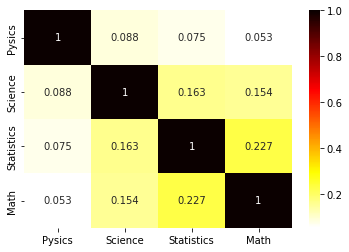

In [13]:
# plot correlation among columns
sns.heatmap(corr, cmap='hot_r', annot=True, fmt='g')

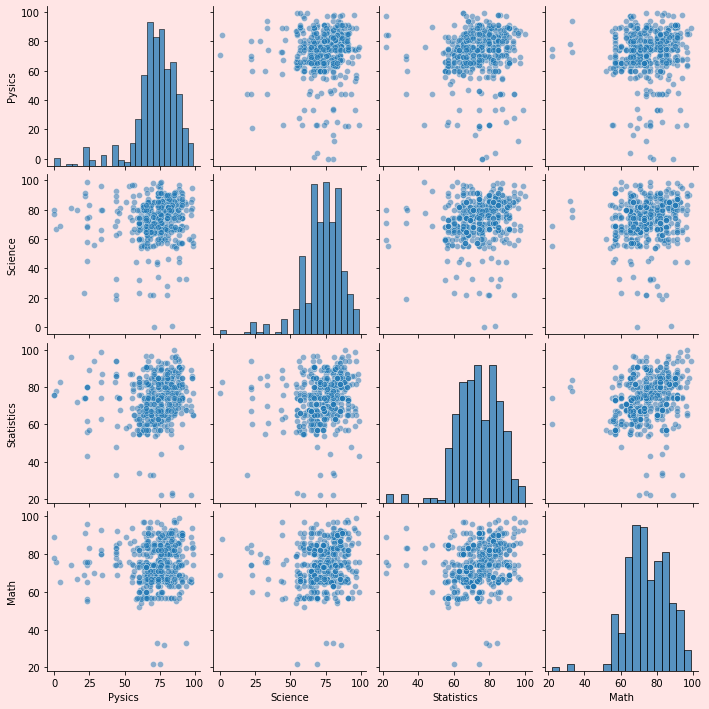

In [14]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
sns.pairplot(data=data, plot_kws={'alpha':0.5},palette='hot_r')
plt.show()

In [15]:
upper_limit_py = data['Pysics'].mean() + 3*data['Pysics'].std()
lower_limit_py = data['Pysics'].mean() - 3*data['Pysics'].std()
upper_limit_sc = data['Science'].mean() + 3*data['Science'].std()
lower_limit_sc = data['Science'].mean() - 3*data['Science'].std()
upper_limit_st = data['Statistics'].mean() + 3*data['Statistics'].std()
lower_limit_st = data['Statistics'].mean() - 3*data['Statistics'].std()
upper_limit_mt = data['Math'].mean() + 3*data['Math'].std()
lower_limit_mt = data['Math'].mean() - 3*data['Math'].std()

print('The boundaries for the outliers are as follows:\n')
print("Upper boundary math_score: ",np.round(upper_limit_py, 2))
print("Lower boundary math_score: ",np.round(lower_limit_py, 2))
print('\n')
print("Upper boundary reading_score: ",np.round(upper_limit_sc, 2))
print("Lower boundary reading_score: ",np.round(lower_limit_sc, 2))
print('\n')
print("Upper boundary writing_score: ",np.round(upper_limit_st, 2))
print("Lower boundary writing_score: ",np.round(lower_limit_st, 2))
print('\n')
print("Upper boundary writing_score: ",np.round(upper_limit_mt, 2))
print("Lower boundary writing_score: ",np.round(lower_limit_mt, 2))

The boundaries for the outliers are as follows:

Upper boundary math_score:  119.84
Lower boundary math_score:  23.64


Upper boundary reading_score:  115.62
Lower boundary reading_score:  30.0


Upper boundary writing_score:  110.22
Lower boundary writing_score:  37.14


Upper boundary writing_score:  108.81
Lower boundary writing_score:  40.27


In [16]:
upper_py = np.where(data['Pysics'] > upper_limit_py)
lower_py = np.where(data['Pysics'] < lower_limit_py)
data.drop(upper_py[0], inplace = True)
data.drop(lower_py[0], inplace = True)
data = data.reset_index(drop=True)

upper_sc = np.where(data['Science'] > upper_limit_sc)
lower_sc = np.where(data['Science'] < lower_limit_sc)
data.drop(upper_sc[0], inplace = True)
data.drop(lower_sc[0], inplace = True)
data = data.reset_index(drop=True)

upper_st = np.where(data['Statistics'] > upper_limit_st)
lower_st = np.where(data['Statistics'] < lower_limit_st)
data.drop(upper_st[0], inplace = True)
data.drop(lower_st[0], inplace = True)
data = data.reset_index(drop=True)

upper_mt = np.where(data['Math'] > upper_limit_mt)
lower_mt = np.where(data['Math'] < lower_limit_mt)
data.drop(upper_mt[0], inplace = True)
data.drop(lower_mt[0], inplace = True)
data = data.reset_index(drop=True)

In [17]:
print("New Shape: ", data.shape)
data

New Shape:  (430, 4)


,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
...,...,...,...,...
425,75,91,57,73
426,85,74,74,67
427,65,65,83,85
428,76,91,71,82


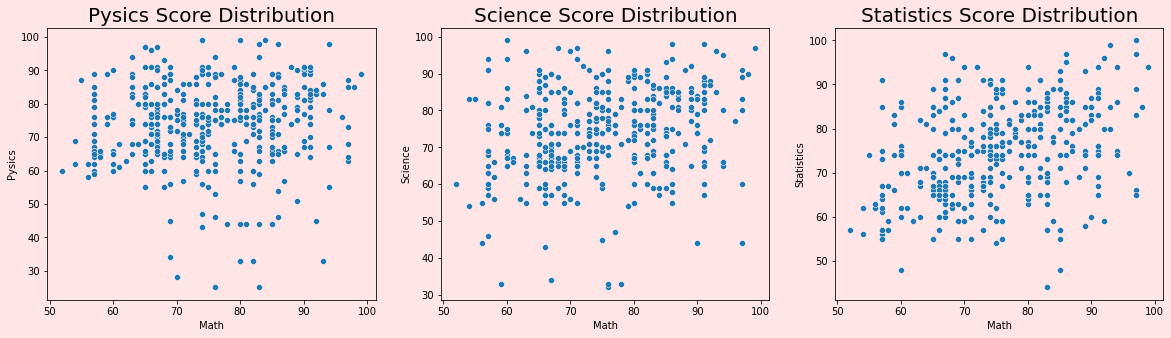

In [18]:
fig, ax=plt.subplots(1,3 ,figsize=(20,5))
sns.scatterplot(data=data, x='Math' , y='Pysics', ax=ax[0])
ax[0].set_title('Pysics Score Distribution', size=20)
sns.scatterplot(data=data, x='Math' , y='Science', ax=ax[1])
ax[1].set_title('Science Score Distribution', size=20)
sns.scatterplot(data=data, x='Math' , y='Statistics', ax=ax[2])
ax[2].set_title('Statistics Score Distribution', size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [19]:
data = data.copy()
cat_cols = ['Pysics', 'Science', 'Statistics']
feats = ['Math', 'Statistics', 'Science', 'Pysics']

le = LabelEncoder()
le_data = data.copy()
for col in feats:
    le_data[col] = le.fit_transform(data[col])
    
train = le_data

In [20]:
x = train[cat_cols]
y = train['Math']

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, test_size = 0.2,
                                                  random_state = 42)

In [22]:
DT = DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, min_samples_leaf=5,
                           random_state=0)
DT.fit(x_train, y_train)

y_train_pred_DT = DT.predict(x_train)
y_val_pred_DT = DT.predict(x_val)

r2_score_DT_train = r2_score(y_train, y_train_pred_DT)
r2_score_DT_val = r2_score(y_val, y_val_pred_DT)
mae_DT = mean_absolute_error(y_val, y_val_pred_DT)

print('R2_score (train): ', r2_score_DT_train)
print('R2_score (test): ', r2_score_DT_val)
print("MAE: ", mae_DT)

R2_score (train):  0.42254538691839505
R2_score (test):  -0.13939461902716666
MAE:  8.122872078313696


In [23]:
LR=LinearRegression()
LR.fit(x_train, y_train)

y_train_pred_LR = LR.predict(x_train)
y_val_pred_LR = LR.predict(x_val)

r2_score_LR_train = r2_score(y_train, y_train_pred_LR)
r2_score_LR_val = r2_score(y_val, y_val_pred_LR)
mae_LR = mean_absolute_error(y_val, y_val_pred_LR)

print('R2_score (train): ', r2_score_LR_train)
print('R2_score (test): ', r2_score_LR_val)
print("MAE: ", mae_LR)

R2_score (train):  0.14412921769035492
R2_score (test):  0.11192416548401618
MAE:  7.382621008864628


In [24]:
Ri= Ridge(alpha=1, fit_intercept=False, solver='saga')
Ri.fit(x_train, y_train)

y_train_pred_Ri = Ri.predict(x_train)
y_val_pred_Ri = Ri.predict(x_val)

r2_score_Ri_train = r2_score(y_train, y_train_pred_Ri)
r2_score_Ri_val = r2_score(y_val, y_val_pred_Ri)
mae_Ri = mean_absolute_error(y_val, y_val_pred_Ri)

print('R2_score (train): ', r2_score_Ri_train)
print('R2_score (test): ', r2_score_Ri_val)
print("MAE: ", mae_Ri)

R2_score (train):  0.06835910848257476
R2_score (test):  0.12803547367283719
MAE:  7.063345375861943


In [25]:
EN= ElasticNet(alpha=0.001, fit_intercept=False, l1_ratio=0.0)
EN.fit(x_train, y_train)

y_train_pred_EN = EN.predict(x_train)
y_val_pred_EN = EN.predict(x_val)

r2_score_EN_train = r2_score(y_train, y_train_pred_EN)
r2_score_EN_val = r2_score(y_val, y_val_pred_EN)
mae_EN = mean_absolute_error(y_val, y_val_pred_EN)

print('R2_score (train): ', r2_score_EN_train)
print('R2_score (test): ', r2_score_EN_val)
print("MAE: ", mae_EN)

R2_score (train):  0.06835927009177944
R2_score (test):  0.12813265130953844
MAE:  7.062834614064825


In [26]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

y_train_pred_KNN = KNN.predict(x_train)
y_val_pred_KNN = KNN.predict(x_val)

r2_score_KNN_train = r2_score(y_train, y_train_pred_KNN)
r2_score_KNN_val = r2_score(y_val, y_val_pred_KNN)
mae_KNN = mean_absolute_error(y_val, y_val_pred_KNN)

print('R2_score (train): ', r2_score_KNN_train)
print('R2_score (test): ', r2_score_KNN_val)
print("MAE: ", mae_KNN)

R2_score (train):  0.391067643311672
R2_score (test):  0.08598702882054532
MAE:  7.395348837209302


In [27]:
RF = RandomForestRegressor(criterion='mae', min_samples_leaf=3, min_samples_split=5,
                      n_estimators=500, random_state=0)
RF.fit(x_train, y_train)

y_train_pred_RF = RF.predict(x_train)
y_val_pred_RF = RF.predict(x_val)

r2_score_RF_train = r2_score(y_train, y_train_pred_RF)
r2_score_RF_val = r2_score(y_val, y_val_pred_RF)
mae_RF = mean_absolute_error(y_val, y_val_pred_RF)

print('R2_score (train): ', r2_score_RF_train)
print('R2_score (test): ', r2_score_RF_val)
print("MAE: ", mae_RF)

R2_score (train):  0.5433313253928007
R2_score (test):  0.1311764111379654
MAE:  6.978290697674419


In [28]:
SVR_model = SVR(C=0.1, gamma=0.6)
SVR_model.fit(x_train, y_train)

y_train_pred_SVR_model = SVR_model.predict(x_train)
y_val_pred_SVR_model = SVR_model.predict(x_val)

r2_score_SVR_model_train = r2_score(y_train, y_train_pred_SVR_model)
r2_score_SVR_model_val = r2_score(y_val, y_val_pred_SVR_model)
mae_SVR_model = mean_absolute_error(y_val, y_val_pred_SVR_model)

print('R2_score (train): ', r2_score_SVR_model_train)
print('R2_score (test): ', r2_score_SVR_model_val)
print("MAE: ", mae_SVR_model)

R2_score (train):  0.007904002143889977
R2_score (test):  0.0010199807080615297
MAE:  7.95426645534906


In [29]:
ET = ExtraTreesRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=50,
                    random_state=0)
ET.fit(x_train, y_train)

y_train_pred_ET = ET.predict(x_train)
y_val_pred_ET = ET.predict(x_val)

r2_score_ET_train = r2_score(y_train, y_train_pred_ET)
r2_score_ET_val = r2_score(y_val, y_val_pred_ET)
mae_ET = mean_absolute_error(y_val, y_val_pred_ET)

print('R2_score (train): ', r2_score_ET_train)
print('R2_score (test): ', r2_score_ET_val)
print("MAE: ", mae_ET)

R2_score (train):  0.47175884150478353
R2_score (test):  0.15430198281619067
MAE:  7.028619511890024


In [30]:
GBR = GradientBoostingRegressor(min_samples_leaf=3, min_samples_split=2,
                          n_estimators=50, random_state=0)
GBR.fit(x_train, y_train)

y_train_pred_GBR = GBR.predict(x_train)
y_val_pred_GBR = GBR.predict(x_val)

r2_score_GBR_train = r2_score(y_train, y_train_pred_GBR)
r2_score_GBR_val = r2_score(y_val, y_val_pred_GBR)
mae_GBR = mean_absolute_error(y_val, y_val_pred_GBR)

print('R2_score (train): ', r2_score_GBR_train)
print('R2_score (test): ', r2_score_GBR_val)
print("MAE: ", mae_GBR)

R2_score (train):  0.4224181197126945
R2_score (test):  0.1705672230906925
MAE:  6.951780672264454


In [31]:
XGBR = XGBRegressor(n_estimators = 50, max_depth=3, learning_rate_init=0.2)
XGBR.fit(x_train, y_train)

y_train_pred_XGBR = XGBR.predict(x_train)
y_val_pred_XGBR = XGBR.predict(x_val)

r2_score_XGBR_train = r2_score(y_train, y_train_pred_XGBR)
r2_score_XGBR_val = r2_score(y_val, y_val_pred_XGBR)
mae_XGBR = mean_absolute_error(y_val, y_val_pred_XGBR)

print('R2_score (train): ', r2_score_XGBR_train)
print('R2_score (test): ', r2_score_XGBR_val)
print("MAE: ", mae_XGBR)

[16:57:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2_score (train):  0.5963865225705403
R2_score (test):  0.10285695636356018
MAE:  7.232146085694779


In [32]:
models = [('Decision Tree Regressor', mae_DT, r2_score_DT_train, r2_score_DT_val,''),
          ('Linear Regression', mae_LR, r2_score_LR_train, r2_score_LR_val,'Stable model-Based on R2'),
          ('Ridge', mae_Ri, r2_score_Ri_train, r2_score_Ri_val,'Stable model-Based on R2'),
          ('ElasticNet', mae_EN, r2_score_EN_train, r2_score_EN_val,'Stable model-Based on R2'),
          ('KNeighbors Regressor', mae_KNN, r2_score_KNN_train, r2_score_KNN_val,''),
          ('Random Forest Regressor', mae_RF, r2_score_RF_train, r2_score_RF_val,''),
          ('SVR', mae_SVR_model, r2_score_SVR_model_train, r2_score_SVR_model_val,'Stable model-Based on R2'),
          ('Extra Trees Regressor', mae_ET, r2_score_ET_train, r2_score_ET_val,'The first best-Based on MAE'),
          ('Gradient Boosting Regressor', mae_GBR, r2_score_GBR_train, r2_score_GBR_val,'The second best-Based on MAE'),
          ('XGBRegressor', mae_XGBR, r2_score_XGBR_train, r2_score_XGBR_val,'')]

In [33]:
compare_models  = pd.DataFrame(data = models, columns=['Model', 'MAE', 'R2_Score(train)', 'R2_Score(test)', 'Description'])
compare_models.style.background_gradient(cmap='YlGn')

,Model,MAE,R2_Score(train),R2_Score(test),Description
0,Decision Tree Regressor,8.122872,0.422545,-0.139395,
1,Linear Regression,7.382621,0.144129,0.111924,Stable model-Based on R2
2,Ridge,7.063345,0.068359,0.128035,Stable model-Based on R2
3,ElasticNet,7.062835,0.068359,0.128133,Stable model-Based on R2
4,KNeighbors Regressor,7.395349,0.391068,0.085987,
5,Random Forest Regressor,6.978291,0.543331,0.131176,
6,SVR,7.954266,0.007904,0.001020,Stable model-Based on R2
7,Extra Trees Regressor,7.028620,0.471759,0.154302,The first best-Based on MAE
8,Gradient Boosting Regressor,6.951781,0.422418,0.170567,The second best-Based on MAE
9,XGBRegressor,7.232146,0.596387,0.102857,


<AxesSubplot:xlabel='MAE', ylabel='Model'>

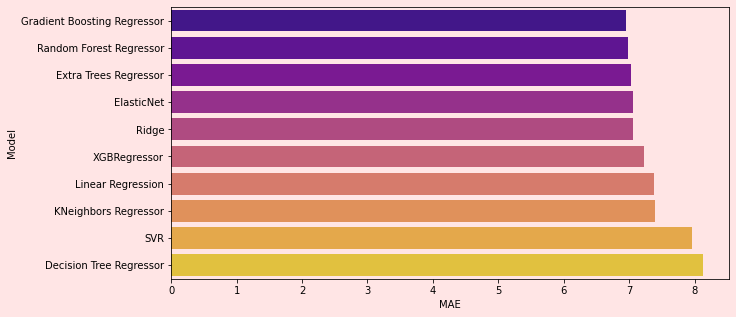

In [34]:
plt.figure(figsize=(10,5))
compare_models.sort_values(by=['MAE'], ascending=True, inplace=True)
sns.barplot(x='MAE', y='Model', data = compare_models, palette='plasma')

Text(0, 0.5, 'Math')

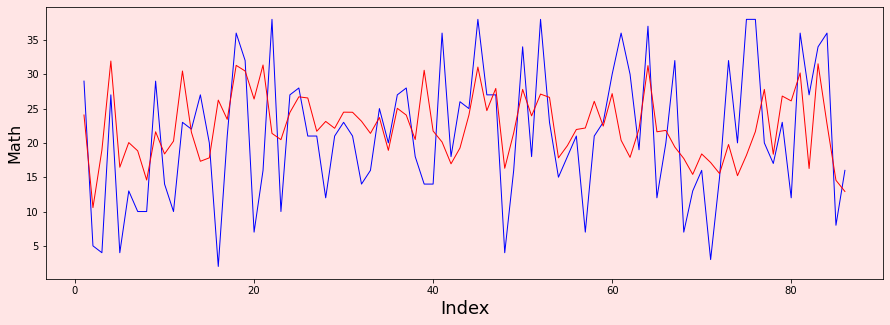

In [35]:
plt.figure(figsize=[15,5])

c = [i for i in range(1,87,1)]
d = [i for i in range(1,87,1)]

plt.plot(c, y_val, color="blue", linewidth=1, linestyle="-")
plt.plot(d, y_val_pred_GBR, color="red",  linewidth=1, linestyle="-")
plt.xlabel('Index', fontsize=18) 
plt.ylabel('Math', fontsize=16)

In [36]:
y_val = y_val.ravel()
actualvspredicted = pd.DataFrame({"Actual":y_val,"Predicted":y_val_pred_GBR, 'Different':y_val-y_val_pred_GBR})
actualvspredicted.head(10).style.background_gradient(cmap='YlGn')

,Actual,Predicted,Different
0,29,24.063329,4.936671
1,5,10.572798,-5.572798
2,4,18.956675,-14.956675
3,27,31.928821,-4.928821
4,4,16.457350,-12.457350
5,13,20.047829,-7.047829
6,10,18.841781,-8.841781
7,10,14.592534,-4.592534
8,29,21.619934,7.380066
9,14,18.392525,-4.392525


Text(336.9714285714286, 0.5, 'Actual')

<Figure size 576x432 with 0 Axes>

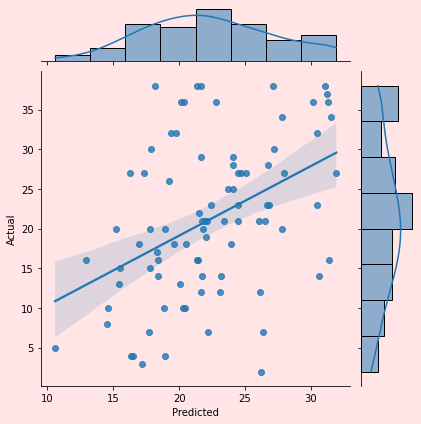

In [37]:
plt.figure(figsize=[8,6])
p = sns.jointplot(actualvspredicted['Predicted'],actualvspredicted['Actual'], kind='reg')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
def shap_and_feature_importance(x, y, features):
    # split
    x_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=100)
    # model
    rf = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=100)
    # fit model
    rf.fit(x_train, y_train)    
    # create object that can calculate shap values
    explainer = shap.TreeExplainer(rf)
    # calculate Shap values
    shap_values = explainer.shap_values(x_train)
    # feature importance plot
    shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")
    # shap summary plot
    shap.summary_plot(shap_values, x_train, feature_names=features)    
    return 

Feature importance and SHAP summary for Math test score


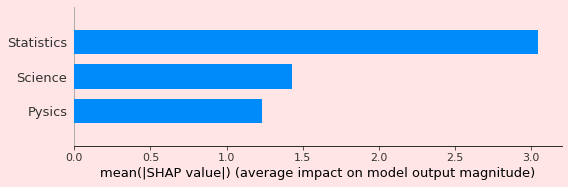

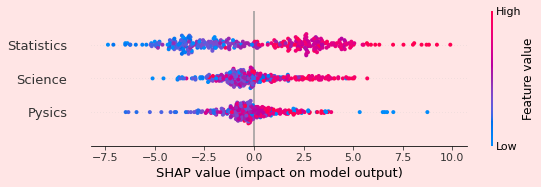

None


In [43]:
print('Feature importance and SHAP summary for Math test score')
print(shap_and_feature_importance(x, y, features=cat_cols))